## Preprocessing Data

In [2]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [15]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [16]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [17]:
print(train_samples)
# for i in train_samples:
#     print(i)

[16, 65, 39, 77, 27, 93, 14, 91, 23, 76, 49, 87, 14, 78, 14, 85, 37, 91, 41, 78, 22, 87, 64, 82, 54, 91, 23, 70, 34, 98, 44, 92, 26, 68, 59, 84, 15, 99, 54, 70, 27, 74, 44, 82, 64, 71, 26, 97, 15, 70, 50, 69, 39, 65, 21, 65, 36, 87, 23, 83, 29, 74, 49, 86, 30, 70, 16, 90, 49, 68, 48, 71, 14, 98, 61, 75, 64, 71, 47, 70, 39, 95, 26, 80, 37, 93, 41, 78, 54, 88, 53, 72, 33, 88, 51, 68, 33, 71, 46, 76, 46, 74, 43, 84, 14, 99, 36, 89, 50, 76, 16, 77, 18, 66, 14, 84, 58, 73, 51, 98, 25, 74, 43, 97, 57, 98, 43, 97, 36, 98, 22, 76, 59, 94, 21, 74, 39, 82, 64, 80, 13, 99, 18, 87, 21, 82, 60, 100, 34, 83, 36, 84, 25, 66, 43, 72, 45, 77, 56, 85, 64, 66, 55, 72, 48, 75, 46, 73, 39, 66, 30, 66, 38, 91, 15, 66, 32, 72, 58, 70, 43, 69, 37, 79, 33, 88, 18, 77, 13, 69, 31, 92, 51, 67, 41, 70, 17, 86, 25, 79, 34, 74, 57, 75, 14, 82, 50, 82, 44, 92, 20, 93, 32, 73, 37, 73, 49, 71, 54, 86, 41, 73, 55, 86, 51, 94, 53, 78, 61, 98, 37, 89, 54, 80, 13, 69, 19, 95, 25, 91, 51, 91, 55, 70, 15, 98, 44, 100, 17, 7

In [18]:
print(train_labels)
# for i in train_labels:
#     print(i)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [21]:
# Convert both lists into numpy arrays 
# https://stackoverflow.com/questions/993984/what-are-the-advantages-of-numpy-over-regular-python-lists

train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

#train_labels,train_samples=shuffle(train_labels,train_samples)
print(train_samples)
print(train_labels)



[16 65 39 ... 81 64 81]
[1 0 1 ... 1 0 1]


In [63]:
#Reshaping tutorial
abc = np.array([1,2,3,5,6])
print(abc)
print(abc.shape)
print(abc.reshape(-1,1))
print(abc.reshape(-1,1).shape)

for i in abc.reshape(-1,1):
    print(i)
    
for i in abc:
    print(i)
    
#Syntax
#reshape(blocks,rows,columns), or reshape(rows,columns)
#reshape(-1,1) : -1 to create as many rows as in the original array, 1 means i need 1 column

[1 2 3 5 6]
(5,)
[[1]
 [2]
 [3]
 [5]
 [6]]
(5, 1)
[1]
[2]
[3]
[5]
[6]
1
2
3
5
6


In [73]:
#use sclar object to reshape fit transofrm the input vals to 0-1 form
#reshape because the function acceepts 2Dimenationsl input
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))  
print(scaled_train_samples)

[[0.03448276]
 [0.59770115]
 [0.29885057]
 ...
 [0.7816092 ]
 [0.5862069 ]
 [0.7816092 ]]


## Simple Sequential Model


In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Physical Device Code here, refer 21:36 in https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=3990s

In [74]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


#relu activation function -  output the input directly if it is positive, otherwise, it will output zero
#softmax - Specifically, the network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. Each value in the output of the softmax function is interpreted as the probability of membership for each class.
#shape (1,)
#Softmax

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Adam -Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data
# sparse_categorical_crossentropy - The lose function that we use

In [84]:
print(scaled_train_samples) # note that this is 2d
print(train_labels) # and this is 1d

model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

#with validatin set (note that here the validation split it taken before the shuffle)
#model.fit(scaled_train_samples, train_labels,validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

[[0.03448276]
 [0.59770115]
 [0.29885057]
 ...
 [0.7816092 ]
 [0.5862069 ]
 [0.7816092 ]]
[1 0 1 ... 1 0 1]
Epoch 1/20
210/210 - 0s - loss: 0.2237 - accuracy: 0.9457
Epoch 2/20
210/210 - 0s - loss: 0.2234 - accuracy: 0.9514
Epoch 3/20
210/210 - 0s - loss: 0.2234 - accuracy: 0.9452
Epoch 4/20
210/210 - 0s - loss: 0.2233 - accuracy: 0.9514
Epoch 5/20
210/210 - 0s - loss: 0.2229 - accuracy: 0.9429
Epoch 6/20
210/210 - 0s - loss: 0.2230 - accuracy: 0.9495
Epoch 7/20
210/210 - 0s - loss: 0.2227 - accuracy: 0.9471
Epoch 8/20
210/210 - 0s - loss: 0.2226 - accuracy: 0.9514
Epoch 9/20
210/210 - 0s - loss: 0.2226 - accuracy: 0.9457
Epoch 10/20
210/210 - 0s - loss: 0.2224 - accuracy: 0.9514
Epoch 11/20
210/210 - 0s - loss: 0.2222 - accuracy: 0.9514
Epoch 12/20
210/210 - 0s - loss: 0.2221 - accuracy: 0.9510
Epoch 13/20
210/210 - 0s - loss: 0.2219 - accuracy: 0.9467
Epoch 14/20
210/210 - 0s - loss: 0.2218 - accuracy: 0.9524
Epoch 15/20
210/210 - 0s - loss: 0.2216 - accuracy: 0.9495
Epoch 16/20
210/

# Save and Load Model

## 1. model.save()

In [85]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [87]:
# from keras.models import load_model
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [88]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [89]:
new_model.get_weights()

[array([[ 0.5561034 ,  0.34141016,  0.6794863 , -0.5514803 ,  0.4604888 ,
          0.15333319, -0.2410169 , -0.2560547 , -0.53846115,  0.43478328,
          0.4520424 , -0.3190799 ,  0.35396117,  0.57932633, -0.5488652 ,
          0.70101833]], dtype=float32),
 array([-0.20439675, -0.17464626, -0.255359  ,  0.        , -0.23310092,
         0.20712724,  0.        ,  0.        ,  0.        , -0.22010015,
        -0.22909038,  0.        , -0.17924239,  0.20596308,  0.        ,
        -0.23991583], dtype=float32),
 array([[-4.37281132e-02,  1.95367172e-01, -2.22632185e-01,
          1.05354816e-01, -2.33667016e-01, -2.61804938e-01,
         -1.86254844e-01,  6.37187958e-02,  2.97886461e-01,
          2.39527181e-01, -2.51901001e-01,  3.03705513e-01,
          2.62788802e-01, -2.77882338e-01,  2.61186033e-01,
         -2.24625930e-01, -2.61573970e-01,  6.63847625e-01,
          3.58521610e-01, -2.92054147e-01, -4.21086758e-01,
         -3.72107238e-01,  1.32070988e-01, -3.93300712e-01,
 

In [90]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [91]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [92]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [93]:
# model reconstruction from JSON:
# from keras.models import model_from_json
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [94]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [95]:
model.save_weights('my_model_weights.h5')

In [98]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [99]:
model2.load_weights('my_model_weights.h5')

## Preprocess Test Data

In [100]:
test_labels =  []
test_samples = []

In [102]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [103]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [104]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [105]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [114]:
print(predictions.shape) # notice for each sample two columns

print(predictions)

(840, 2)
[[0.84198374 0.15801626]
 [0.07142837 0.9285716 ]
 [0.66478455 0.33521542]
 ...
 [0.07853193 0.92146814]
 [0.96740294 0.03259704]
 [0.04404931 0.95595074]]


In [106]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [118]:
print(rounded_predictions.shape) # notice the shape difference, 0 if first val big, 1 if second big
print(rounded_predictions)

(840,)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1

## Confusion Matrix

In [119]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [120]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[400  20]
 [ 20 400]]


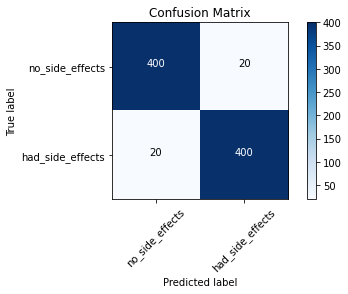

In [122]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')